In [1]:
import cv2,os
import numpy as np
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
mp_holistic=mp.solutions.holistic #model holistic
mp_drawing=mp.solutions.drawing_utils #vẽ các utilities

In [3]:
def mediapipe_detection(image,model):
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #chuyển màu sắc TỪ BGR TO RGB
    image.flags.writeable=False
    result=model.process(image) #model xử lý + xác định
    image.flags.writeable=True
    image=cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #CHUYỂN NGƯỢC LẠI
    return image,result

In [4]:
def draw_landmark(image,result):
    mp_drawing.draw_landmarks(image,result.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image,result.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS)


In [5]:
def draw_styled_landmark(image,result):
    mp_drawing.draw_landmarks(image,result.right_hand_landmarks,
                              mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,110,10),thickness=1,circle_radius=3))
    mp_drawing.draw_landmarks(image,result.left_hand_landmarks,
                          
                              mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,110,10),thickness=1,circle_radius=3))

In [6]:
cap=cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        
        #đọc phản hồi từ camera
        ret,frame=cap.read()

        
    # xác định hình ảnh
        image,result=mediapipe_detection(frame,holistic)
        print(result)
        draw_styled_landmark(image,result)
        #show to screen
        cv2.imshow(' head feed',image)
        #break
        if cv2.waitKey(10) & 0xFF==ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()



<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
draw_landmark(frame,result)

# 1. Extract giá trị sử dụng 

In [8]:
def extract_result(result):
    if  result.left_hand_landmarks:
    # Trích xuất tọa độ x, y, z từ result.left_hand_landmarks
        lh = np.array([[res.x, res.y, res.z] for res in result.left_hand_landmarks.landmark]).flatten()
        # flatten flatten() để biến mảng 2D này thành một mảng 1D.
    else:
        # Nếu result hoặc result.left_hand_landmarks không có giá trị, trả về mảng chứa 0
        lh = np.zeros(21 * 3)
    if  result.right_hand_landmarks:
        # Trích xuất tọa độ x, y, z từ result.left_hand_landmarks

        rh = np.array([[res.x, res.y, res.z] for res in result.right_hand_landmarks.landmark]).flatten()
    else:
        # Nếu result hoặc result.left_hand_landmarks không có giá trị, trả về mảng chứa 0
        rh = np.zeros(21 * 3)
    return np.concatenate([lh,rh])


In [9]:
extract_result(result).shape

(126,)

# * Set up folder  Data Collectiion

In [10]:

DATA_PATH=os.path.join("datacopy")
# nhãn cho từng hành động để lấy con chữ
actions = [folder for folder in os.listdir(DATA_PATH) if os.path.isdir(os.path.join(DATA_PATH, folder))]
# actions = np.array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'have a nice day', 'read'])
# actions = np.array(['J', 'L'])
print(actions)
# 30 video có giá trị dữ liệu
no_sequences=30
#video có chiều dài 30 frame
sequences_len=30



['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'have a nice day', 'J', 'L', 'read']


In [11]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass
#thử nghiệm


# Thu thập dữ liệu cho training và testing

In [87]:
cap=cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    #New loop
    # Giải thích: vòng lặp này sẽ lặp lại 30 lần (no_sequences = 30) để thu thập dữ liệu cho mỗi hành động.
    for action in actions:
       
        for sequence in range(no_sequences):
            for frame_num in range(sequences_len):

        
                #đọc phản hồi từ camera
                ret,frame=cap.read()
                # xác định hình ảnh
                image,result=mediapipe_detection(frame,holistic)
                # print(result)
                draw_styled_landmark(image,result)

                #LOGIC APPLY
                if frame_num ==0:
                    cv2.putText(image,'STARTING COLLECTION',(120,200),
                                cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),4,cv2.LINE_AA)
    
                    cv2.putText(image,'Collecting frames for {} Video Number {}'.format(action,sequence),(15,12),
                                cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA) 
                    cv2.waitKey(2000)
                else :
                    cv2.putText(image,'Collecting frames for {} Video Number {}'.format(action,sequence),(15,12),
                                cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)

                #Keypoints mới được xuất 
                keypoints=extract_result(result)
                npy_path=os.path.join(DATA_PATH,action,str(sequence),str(frame_num))
                np.save(npy_path,keypoints)
                #show to screen
                cv2.imshow(' head feed',image)
                #break
                if cv2.waitKey(10) & 0xFF==ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()

In [12]:
cap.release()
cv2.destroyAllWindows()

# Gắn nhãn dữ liệu


In [13]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical



In [14]:
label_map={label:num for num,label in enumerate(actions)}
label_map

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'have a nice day': 8,
 'J': 9,
 'L': 10,
 'read': 11}

In [15]:
sequences,labels=[],[]
for action in actions:
    for sequence in range(no_sequences):
        window=[]
        for frame_num in range (sequences_len):
            res=np.load(os.path.join(DATA_PATH,action,str(sequence),"{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [16]:
np.array(labels).shape

(360,)

In [17]:
np.array(sequences).shape

(360, 30, 126)

In [18]:


X=np.array(sequences)
X.shape

(360, 30, 126)

In [19]:
X=np.array(sequences)
X.shape

(360, 30, 126)

In [20]:
y=to_categorical(labels).astype(int)
print(y)


[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [49]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.05)
x_train.shape

(342, 30, 126)

In [50]:
x_test.shape


(18, 30, 126)

In [52]:
y_train.shape

(342, 12)

In [53]:
y_test.shape

(18, 12)

# Xây dựng model huấn luyện LSTM Network

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Conv1D,MaxPooling1D, Conv2D,TimeDistributed,Flatten,Dropout
from tensorflow.keras.callbacks import TensorBoard
import os

In [55]:
log_dir=os.path.join("Logs")
tb_callback=TensorBoard(log_dir=log_dir)



In [56]:
actions = np.array(actions)

actions.shape[0]

12

In [72]:
del model

model=Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(30, 126))) 
model.add(MaxPooling1D(pool_size=2))


model.add(LSTM(64, return_sequences=True, activation='relu'))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))

model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))


model.add(Dense(actions.shape[0], activation='softmax'))


# # Lớp Convolutional 1
# model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(30, 126)))
# model.add(MaxPooling1D(pool_size=2))

# # Lớp Convolutional 2
# model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
# model.add(MaxPooling1D(pool_size=2))

# # Lớp Flatten
# model.add(Flatten())

# # Lớp Fully Connected 1
# model.add(Dense(128, activation='relu'))

# # Lớp Fully Connected 2 (Output Layer)
# model.add(Dense(actions.shape[0], activation='softmax'))




# actions = np.array(actions)

# model=Sequential()
# # Add convolutional layers for image frames
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(30, 258)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))

# model.add(TimeDistributed(Flatten()))

# # Add LSTM layers
# model.add(LSTM(64, return_sequences=True, activation='relu'))
# model.add(LSTM(128, return_sequences=True, activation='relu'))
# model.add(LSTM(64, return_sequences=False, activation='relu'))

# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))

# model.add(Dense(actions.shape[0],activation='softmax'))


In [73]:
from tensorflow.keras.optimizers import Adam,Adadelta

optimizer = Adadelta(learning_rate=0.5)

In [74]:
model.compile(optimizer= "Adam",loss='categorical_crossentropy',metrics=['categorical_accuracy'])


In [75]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Tạo một callback để lưu mô hình chỉ khi loss trên tập validation giảm
checkpoint_callback = ModelCheckpoint("checkpoint/LSTM-{epoch:03d}-{val_loss:03f}-{loss:03f}.h5", monitor="val_loss", save_best_only=True)

# Huấn luyện mô hình và sử dụng callback
history = model.fit(x_train, y_train, epochs=300, validation_data=(x_test, y_test), callbacks=[checkpoint_callback], verbose=2)

Epoch 1/300


11/11 - 9s - loss: 2.4816 - categorical_accuracy: 0.0994 - val_loss: 2.4772 - val_categorical_accuracy: 0.0000e+00 - 9s/epoch - 826ms/step
Epoch 2/300
11/11 - 1s - loss: 2.4263 - categorical_accuracy: 0.1140 - val_loss: 2.4399 - val_categorical_accuracy: 0.1111 - 589ms/epoch - 54ms/step
Epoch 3/300
11/11 - 1s - loss: 2.1960 - categorical_accuracy: 0.1520 - val_loss: 2.3756 - val_categorical_accuracy: 0.0556 - 617ms/epoch - 56ms/step
Epoch 4/300
11/11 - 1s - loss: 2.0470 - categorical_accuracy: 0.1959 - val_loss: 2.2373 - val_categorical_accuracy: 0.0556 - 551ms/epoch - 50ms/step
Epoch 5/300
11/11 - 1s - loss: 2.0250 - categorical_accuracy: 0.2222 - val_loss: 2.2108 - val_categorical_accuracy: 0.1111 - 536ms/epoch - 49ms/step
Epoch 6/300
11/11 - 1s - loss: 1.8917 - categorical_accuracy: 0.2749 - val_loss: 2.1011 - val_categorical_accuracy: 0.1111 - 584ms/epoch - 53ms/step
Epoch 7/300
11/11 - 0s - loss: 1.8420 - categorical_accuracy: 0.3392 - val_loss: 2.0504 - val_categorical_accuracy: 

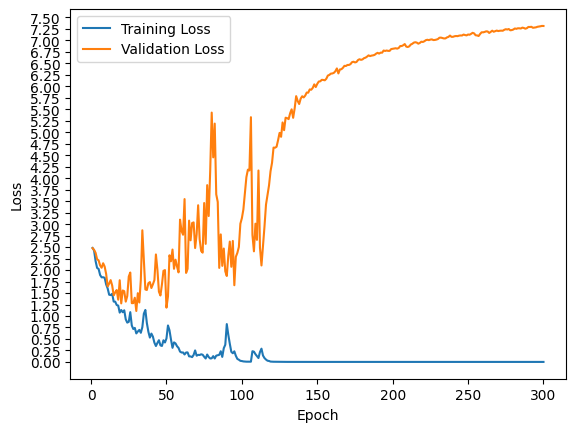

In [76]:
# Lấy thông tin về loss từ lịch sử
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Vẽ biểu đồ loss theo epoch
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Tùy chỉnh thang đo của trục y thành 0.25
plt.yticks([i * 0.25 for i in range(int(max(max(train_loss), max(val_loss)) / 0.25) + 2)])

plt.show()


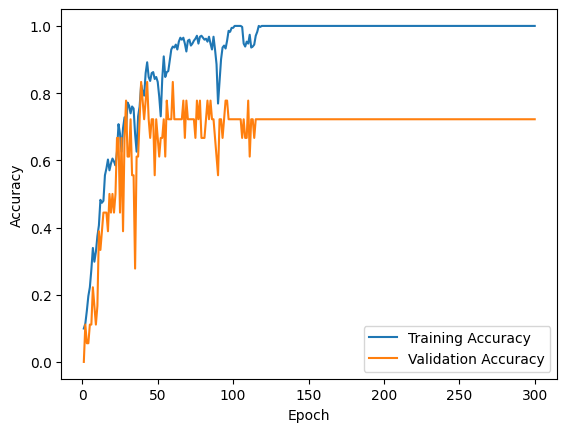

In [77]:
# Lấy thông tin về loss từ lịch sử
train_acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

# Vẽ biểu đồ loss theo epoch
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [450]:
model.summary()



Model: "sequential_69"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_45 (Conv1D)          (None, 28, 32)            12128     
                                                                 
 max_pooling1d_45 (MaxPooli  (None, 14, 32)            0         
 ng1D)                                                           
                                                                 
 lstm_192 (LSTM)             (None, 14, 64)            24832     
                                                                 
 lstm_193 (LSTM)             (None, 14, 128)           98816     
                                                                 
 lstm_194 (LSTM)             (None, 64)                49408     
                                                                 
 dense_195 (Dense)           (None, 64)                4160      
                                                     

# Lưu model

In [64]:
# model.save("models/CNN_LSTM_VL0.5.h5")

c:\Users\huyda\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Đánh giá mô hình

In [285]:
del model

In [340]:

model.load_weights("models/actionv5_4_label_ABCDEFGH.h5")

In [78]:
from sklearn.metrics import accuracy_score,multilabel_confusion_matrix

In [79]:
y_preds= model.predict(x_test)

1/1 [==============================] - 2s 2s/step


In [80]:
y_true=np.argmax(y_test,axis=1).tolist()
y_preds=np.argmax(y_preds,axis=1).tolist()


In [81]:
y_true

[11, 10, 4, 0, 9, 0, 4, 2, 10, 5, 0, 8, 1, 3, 9, 10, 10, 1]

In [82]:
y_preds

[11, 1, 4, 5, 8, 0, 4, 2, 10, 4, 0, 8, 1, 3, 9, 10, 10, 5]

In [83]:
multilabel_confusion_matrix(y_true,y_preds)

array([[[15,  0],
        [ 1,  2]],

       [[15,  1],
        [ 1,  1]],

       [[17,  0],
        [ 0,  1]],

       [[17,  0],
        [ 0,  1]],

       [[15,  1],
        [ 0,  2]],

       [[15,  2],
        [ 1,  0]],

       [[16,  1],
        [ 0,  1]],

       [[16,  0],
        [ 1,  1]],

       [[14,  0],
        [ 1,  3]],

       [[17,  0],
        [ 0,  1]]], dtype=int64)

In [84]:
accuracy_score(y_true,y_preds)


0.7222222222222222

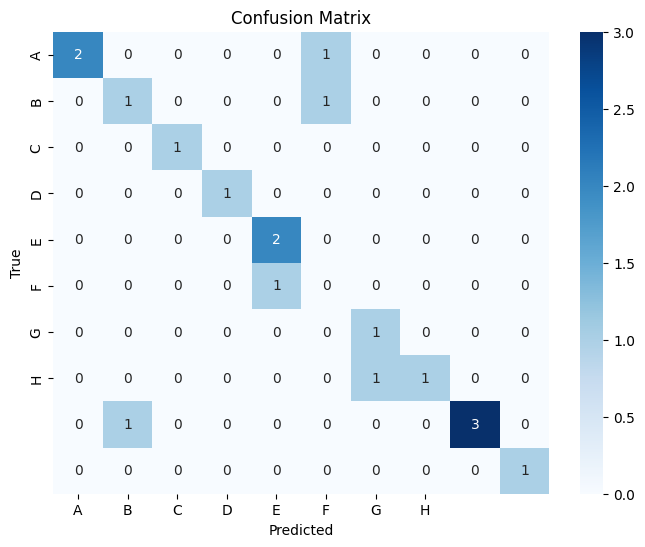

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics


# Tính confusion matrix
cm = confusion_matrix(y_true, y_preds)

# Vẽ confusion matrix bằng seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["A", "B", "C", "D", "E", "F", "G", "H"], yticklabels=["A", "B", "C", "D", "E", "F", "G", "H"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Test in Real time

In [86]:
import pyttsx3
engine = pyttsx3.init()
rate = engine.getProperty('rate')
engine.setProperty('rate', rate - 50)

In [94]:
colors=[(245,117,16),(117,245,16),(16,117,245),(16,245,235),(255, 0, 0), (0, 255, 0), (0, 0, 255), (128, 128, 0),
       ]
def pro_viz(res,actions,input_frame,colors):
    output_frame=input_frame.copy()
    for num,prob in enumerate(res):
        if num < len(colors):
            cv2.rectangle(output_frame,(0,60+num*40),(int(prob*100),90+num*40),colors[num],-1)
            cv2.putText(output_frame,actions[num],(0,85+num*40),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)

    return output_frame

In [96]:
print(actions)
# plt.imshow(pro_viz(res,actions,frame,colors))

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'have a nice day' 'J' 'L' 'read']


In [97]:

#Các biến giá trị mới
sequence=[]
sentence=[]
threshold=0.8 #ngưỡng


cap=cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        
        #đọc phản hồi từ camera
        ret,frame=cap.read()

        
        # xác định hình ảnh
        image,result=mediapipe_detection(frame,holistic)
        print(result)
        # vẽ các landmark
        draw_styled_landmark(image,result)

        #2. LOGIC APPLY
        keypoints=extract_result(result)
        # sequence.insert(0,keypoints)
        # sequence=sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        if len(sequence)==30:
            res=model.predict(np.expand_dims(sequence,axis=0))[0]
        #3. Vẽ các kết quả
            if res[np.argmax(res)]>threshold:
                if len(sentence)>0:
                    if actions[np.argmax(res)]!=sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else: 
                    print(np.argmax(res))
                    print(actions[np.argmax(res)])                
                    sentence.append(actions[np.argmax(res)])
            if len(sentence)>5:
                sentence=sentence[-5:]
    
        
        image=pro_viz(res,actions,image,colors)
        cv2.rectangle(image,(0,0),(640,40),(245,117,16),-1)
        cv2.putText(image,' '.join(sentence),(3,30),
                    cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
        #đọc chữ cái được nhận dạng
        
        
        #show to screen
        cv2.imshow(' head feed',image)
        #break
        if cv2.waitKey(10) & 0xFF==ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()



<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [90]:
cap.release()
cv2.destroyAllWindows()

In [91]:
res[np.argmax(res)]>threshold

True

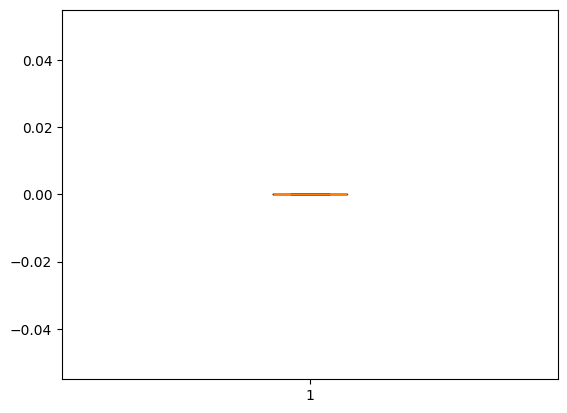

In [92]:
import matplotlib.pyplot as plt

data = np.load("datacopy/have a nice day/0/3.npy")

# data = np.load("data.npy")

plt.boxplot(data)
plt.show()



In [93]:
print(len(actions)) 

12
